<a href="https://colab.research.google.com/github/B4Farouk/smpl-dr-clip/blob/main/SMPL_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:

!pip install smplpytorch
!pip install chumpy
!git clone https://github.com/B4Farouk/smpl-dr-clip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'smpl-dr-clip' already exists and is not an empty directory.


In [18]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
# plt.switch_backend('agg')


def display_model(
        model_info,
        model_faces=None,
        with_joints=False,
        kintree_table=None,
        ax=None,
        batch_idx=0,
        show=True,
        savepath=None):
    """
    Displays mesh batch_idx in batch of model_info, model_info as returned by
    generate_random_model
    """
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    verts, joints = model_info['verts'][batch_idx], model_info['joints'][
        batch_idx]
    if model_faces is None:
        ax.scatter(verts[:, 0], verts[:, 1], verts[:, 2], alpha=0.2)
    else:
        mesh = Poly3DCollection(verts[model_faces], alpha=0.2)
        face_color = (141 / 255, 184 / 255, 226 / 255)
        edge_color = (50 / 255, 50 / 255, 50 / 255)
        mesh.set_edgecolor(edge_color)
        mesh.set_facecolor(face_color)
        ax.add_collection3d(mesh)
    if with_joints:
        draw_skeleton(joints, kintree_table=kintree_table, ax=ax)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-0.7, 0.7)
    ax.set_ylim(-0.7, 0.7)
    ax.set_zlim(-0.7, 0.7)
    ax.view_init(azim=-90, elev=100)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    if savepath:
        print('Saving figure at {}.'.format(savepath))
        plt.savefig(savepath, bbox_inches='tight', pad_inches=0)
    if show:
        plt.show()
    return mesh


def draw_skeleton(joints3D, kintree_table, ax=None, with_numbers=True):
    if ax is None:
        fig = plt.figure(frameon=False)
        ax = fig.add_subplot(111, projection='3d')
    else:
        ax = ax

    colors = []
    left_right_mid = ['r', 'g', 'b']
    kintree_colors = [2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1]
    for c in kintree_colors:
        colors += left_right_mid[c]
    # For each 24 joint
    for i in range(1, kintree_table.shape[1]):
        j1 = kintree_table[0][i]
        j2 = kintree_table[1][i]
        ax.plot([joints3D[j1, 0], joints3D[j2, 0]],
                [joints3D[j1, 1], joints3D[j2, 1]],
                [joints3D[j1, 2], joints3D[j2, 2]],
                color=colors[i], linestyle='-', linewidth=2, marker='o', markersize=5)
        if with_numbers:
            ax.text(joints3D[j2, 0], joints3D[j2, 1], joints3D[j2, 2], j2)
    return 

Saving figure at image.png.


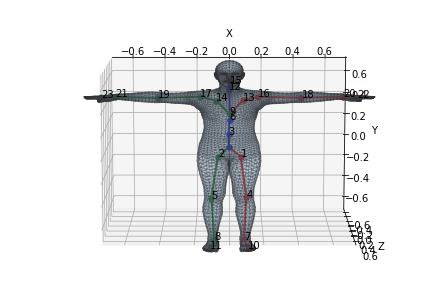

In [19]:
import torch

from smplpytorch.pytorch.smpl_layer import SMPL_Layer



batch_size = 1

# Create the SMPL layer
smpl_layer = SMPL_Layer(
center_idx=0,
gender='neutral',
model_root='/content/smpl-dr-clip')

# Generate T pose
pose_params = torch.zeros(batch_size, 72)
shape_params = torch.zeros(batch_size, 10)




# Forward from the SMPL layer

true_verts, true_Jtr = smpl_layer(pose_params, th_betas=shape_params)

# Draw output vertices and joints
display_model(
        {'verts': true_verts.cpu().detach(),
         'joints': true_Jtr.cpu().detach()},
        model_faces=smpl_layer.th_faces,
        with_joints=True,
        kintree_table=smpl_layer.kintree_table,
        savepath='image.png',
        show=True)

In [20]:
def mse_loss(x,y):
  return torch.sum(torch.sum(torch.square(x-y)))

def loss_function(true_verts,verts):
  return mse_loss(true_verts,verts)

In [21]:
loss_function(true_verts,true_verts)

tensor(0.)

tensor(349.1671, grad_fn=<SumBackward0>)
tensor(311.3754, grad_fn=<SumBackward0>)
tensor(286.2315, grad_fn=<SumBackward0>)
tensor(269.5389, grad_fn=<SumBackward0>)
tensor(258.4559, grad_fn=<SumBackward0>)
tensor(251.0687, grad_fn=<SumBackward0>)
tensor(246.1060, grad_fn=<SumBackward0>)
tensor(242.7320, grad_fn=<SumBackward0>)
tensor(240.3989, grad_fn=<SumBackward0>)
tensor(238.7494, grad_fn=<SumBackward0>)
tensor(237.5503, grad_fn=<SumBackward0>)
tensor(236.6499, grad_fn=<SumBackward0>)
tensor(235.9484, grad_fn=<SumBackward0>)
tensor(235.3810, grad_fn=<SumBackward0>)
tensor(234.9049, grad_fn=<SumBackward0>)
tensor(234.4918, grad_fn=<SumBackward0>)
tensor(234.1231, grad_fn=<SumBackward0>)
tensor(233.7859, grad_fn=<SumBackward0>)
tensor(233.4719, grad_fn=<SumBackward0>)
tensor(233.1755, grad_fn=<SumBackward0>)
tensor(232.8924, grad_fn=<SumBackward0>)
tensor(232.6199, grad_fn=<SumBackward0>)
tensor(232.3560, grad_fn=<SumBackward0>)
tensor(232.0993, grad_fn=<SumBackward0>)
tensor(231.8485,

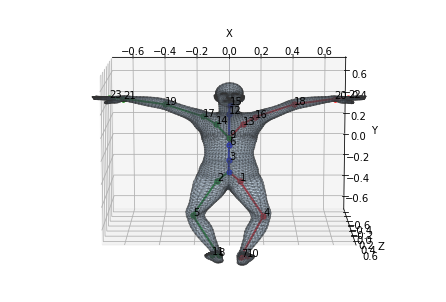

In [22]:


# Create the SMPL layer
smpl_layer = SMPL_Layer(
model_root='/content/smpl-dr-clip')

# Generate random pose and shape parameters
pose_params = torch.zeros(batch_size, 72,requires_grad=True)
shape_params = torch.zeros(batch_size, 10,requires_grad=True)
# Forward from the SMPL layer
optimizer = torch.optim.SGD([pose_params, shape_params], lr=0.0001)
for i in range(1000):
  verts, Jtr = smpl_layer(pose_params, shape_params)

  loss=loss_function(true_verts,verts)
  print(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
# Draw output vertices and joints
display_model(
        {'verts': verts.cpu().detach(),
         'joints': Jtr.cpu().detach()},
        model_faces=smpl_layer.th_faces,
        with_joints=True,
        kintree_table=smpl_layer.kintree_table,
        savepath='image.png',
        show=True)

In [23]:
def SMPL(Beta,Theta):
  verts, Jtr=smpl_layer(Beta,Theta)


In [24]:

import torch

from smplpytorch.pytorch.smpl_layer import SMPL_Layer


def mesh_generation():

  cuda = False
  batch_size = 1

  # Create the SMPL layer
  smpl_layer = SMPL_Layer(
  center_idx=0,
  gender='neutral',
  model_root='/content/smpl-dr-clip')

  # Generate random pose and shape parameters
  for i in range(5):
    pose_params = torch.rand(batch_size, 72) * (0.2-i*0.1)
    shape_params = torch.rand(batch_size, 10) * 0.03

      # GPU mode
    if cuda:
      pose_params = pose_params.cuda()
      shape_params = shape_params.cuda()
      smpl_layer.cuda()

    # Forward from the SMPL layer

    true_verts, true_Jtr = smpl_layer(pose_params, th_betas=shape_params)
    torch.save(true_verts,"verts_"+str(i)+'.pt')
    torch.save(true_verts,"Jtr_"+str(i)+'.pt')
